In [1]:
# This code was written with some guidance from the following sources:
# S. Shamdasani, "Build a flexible Neural Network with Backpropagation in Python", dev.to, 07.08.2017, 
# https://dev.to/shamdasani/build-a-flexible-neural-network-with-backpropagation-in-python
# S. Haykin, "NEURAL NETWORKS A comprehensive foundation" Neural networks 2.2004 (2004): 41.
# J. Strigins, "NEIRONU TĪKLI : IEEJAS DATU UN TĪKLA PARAMETRU IETEKME UZ APMĀCĪBAS PROCESU", LU DF, Rīga, 2013
# J. Sergejevs, "LAIKRINDU PROGNOZĒŠANA IZMANTOJOT KOHONENA NEIRONU TĪKLU", LU FMF, Rīga, 2008

# Self reference - https://github.com/GraphC/AccelNet/edit/master/AccelNet_4.0.ipynb

import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import operator
from numpy import *
from datetime import datetime
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

class Neural_Network(object):
    def __init__(self, inputSize=1, hiddenSize=3, learningRate = 1, momentum = 0):
        # Input parameters
        self.inputSize = inputSize
        self.hiddenSize = hiddenSize
        self.outputSize = 1
        self.learningRate = learningRate
        self.momentum = momentum
        self.trains = 0

        # Weights
        np.random.seed(0)
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # Weigth matrix 1 | Input -> Hidden layers
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # Weight matrix 2 | Hidden -> Output layers
        self.W1n = self.W1 # Initialization for temporary previous weight placeholders
        self.W2n = self.W2
        self.W1prev = self.W1 # Initialization for previous weight placeholders
        self.W2prev = self.W2

    def forward(self, X):
        self.inWeighted = np.dot(X, self.W1) # Weighed input values
        self.inActivated = self.tanh(self.inWeighted) # Activated input values
        self.hiddenWeighted = np.dot(self.inActivated, self.W2) # Weighed output from hidden layer
        o = self.tanh(self.hiddenWeighted) # Activated values from the weighed hidden layer
        return o
    
    def tanh(self, s): # Hyperbolic tangent function
        return (np.exp(s)-np.exp(-s))/(np.exp(s)+np.exp(-s))
    
    def tanhPrime(self, s): # Derivative from the hyperbolic tangent
        return 1-(pow(double(s),2.0))

    def backward(self, X, y, o):
        self.oError = y - o # Sets the error from the difference of predicted:actual value
        self.oDelta = self.oError*self.tanhPrime(o) # Applies the derivative of hyperbolic tangent to error

        self.hiddenError = self.oDelta.dot(self.W2.T) # Sets the hidden layer error from the dot product of the previous delta and transposed second weights
        self.hiddenDelta = self.hiddenError*self.tanhPrime(self.inActivated) # Applies the derivative of hyperbolic tangent to error
        
        self.W1prev = self.W1n.copy() # Stores the previous W2 value
        self.W1n = self.W1.copy() # Temp for the prevous W2 value
        self.W1m = self.momentum*(self.W1 - self.W1prev)
        # ^ Adjusts the difference of the previous and current W2 weights with the momentum
        self.W1l = self.learningRate*X.T.dot(self.hiddenDelta)
        # ^ Adjusts the dot product of the wigthed and activated input values of the specific layer and 
        #   that layers activated error with the learning rate. 
        
        self.W2prev = self.W2n.copy() 
        self.W2n = self.W2.copy()
        self.W2m = self.momentum*(self.W2 - self.W2prev) 
        self.W2l = self.learningRate*self.inActivated.T.dot(self.oDelta) 
                    
        self.W1 += self.W1l + self.W1m # Adjusting W1 by adding the combination of the previously acquired values
        self.W2 += self.W2l + self.W2m
    
    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
        self.trains += 1
    

Entering NN loop...
Global start time:  2018-05-19 11:23:44.140970


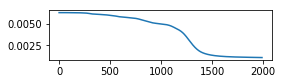

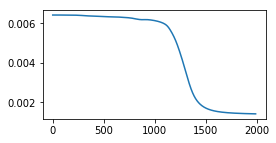

This loop ran for:  0:00:04.862456
Resulting in: loss = 0.0010474328484393585
Resulting in: testloss = 0.0014013278790645524
Parameters:  f = 200 h = 8 m = 0.64 l = 0.08 i = 2001

Global loop ended at:  2018-05-19 11:23:49.025979
Ran for:  0:00:04.885009

The best loss was: {'loss': 0.0010474328484393585, 'm': 0.64, 'r': 2000, 'h': 8, 'fileCount': 300, 'l': 0.08}

The pretty good losses:
['Loss', 0.005047126077620969, 'Itt.no.', 1000, 'h', 8, 'l', 0.08, 'm', 0.64, 'tl', 0.006149021041752046, 'erFilCnt', 97, 'errDiff', 17.77855542384303]
['Loss', 0.0010474328484393585, 'Itt.no.', 2000, 'h', 8, 'l', 0.08, 'm', 0.64, 'tl', 0.0014013278790645524, 'erFilCnt', 83, 'errDiff', 16.26423952311802]
['Loss', 0.0010474328484393585, 'Itt.no.', 2000, 'h', 8, 'l', 0.08, 'm', 0.64, 'tl', 0.0014013278790645524, 'erFilCnt', 153, 'errDiff', 16.26423952311802]


Results of the training:
0 [88.70280256338545] 89.0 [0.2971974366145531]
1 [87.50020196455114] 81.5 [-6.000201964551138]
2 [88.1864018271878] 92.3

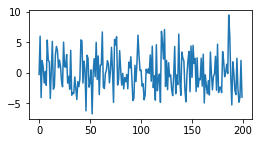


Results of testing:
0 [86.86006878150498] 94.0 [7.139931218495022]
1 [88.94003322994061] 89.5 [0.5599667700593898]
2 [88.77565418770621] 86.9 [-1.8756541877062034]
3 [89.57555000645877] 85.4 [-4.175550006458764]
4 [90.71147490174532] 91.6 [0.8885250982546751]
5 [86.69179741420241] 87.4 [0.7082025857975935]
6 [88.88821553611771] 92.2 [3.31178446388229]
7 [89.19901995774931] 85.9 [-3.2990199577493087]
8 [89.11282432509468] 83.3 [-5.812824325094681]
9 [87.08404376640483] 81.8 [-5.284043766404835]
10 [87.44285921385537] 92.0 [4.557140786144629]
11 [87.01620972434607] 87.6 [0.583790275653925]
12 [79.28720988413991] 82.6 [3.312790115860082]
13 [87.57917186398306] 85.5 [-2.0791718639830634]
14 [89.46320546019895] 90.2 [0.7367945398010534]
15 [85.70058814317231] 85.7 [-0.0005881431723082642]
16 [88.57133999864192] 83.8 [-4.7713399986419205]
17 [87.12657525233884] 85.3 [-1.8265752523388414]
18 [92.13909207737672] 87.0 [-5.139092077376716]
19 [87.51562374077689] 91.5 [3.9843762592231116]
20 [87

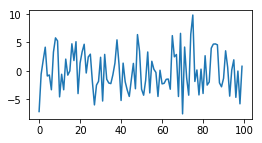

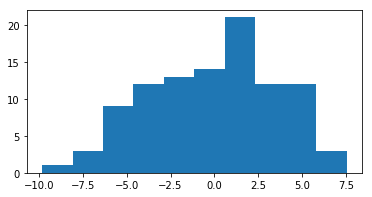

In [2]:
files = glob.glob("/home/laguna/makd/data/*")
np.set_printoptions(suppress=True,precision=20)
plt.rcParams["figure.figsize"] = [4.0, 2.0]
plt.figure(1)
plt.tick_params(labelsize=20)


hiddenLayerNeurons = [8]
#hiddenLayerNeurons = range(0,31)
paramRange = 2001
paramExper = "4" # Test number in the last plots title
paramLR = [0.080] # Learning rate
paramMom = [0.64] # Momentum
trainingData = 200
testData = 100
fileCount = trainingData + testData

#-----------------------------------------------------------
# Variable init and file loading to arrays

np.random.seed(0)
data = [];
distanceList = [];
i = 0

fileNameArr = []
#Exceptions for particular files
exc = [1524841699,1525453392]
for f in files: 
    brr = 0;
    r = re.compile('_\-?([\d\.]+)$')
    if f.endswith("bak"): continue
    #Specifies which datafiles to use
    accepted = re.match(r'.*data\/2_-110.*', f, re.M|re.I)
    if accepted is None: continue
    dist = double(r.findall(f)[0])
    #Specifies which distance files to use
    if dist<80 : continue
    for j in exc:
        if str(j) in f: brr = 1
    if brr == 1: brr = 0; continue
    data.append(loadtxt(f, dtype='object'))    
    distanceList.append(dist)
    fileNameArr.append(f)
    i += 1
    if i >= fileCount: break

#----------------------------------------
# For array reformatting - offset and size adjustment.

#accs = acceleration values, taccs = test accel values
accs = {}; taccs = {}; i = 0;
for dats in data:
    if i < fileCount:
        #print (i, fileNameArr[i])
        # Dividing to training and test datasets
        if i >= (trainingData):
            taccs[i] = []
            offset = 0; j = 0; offcnt = 10;   
            for line in dats: taccs[i].append(double(line[0]))
            for line in taccs[i]:
                if j > offcnt-1: offset /= offcnt; break
                offset += line;
                j += 1;
            taccs[i] = taccs[i]-offset 
            j=0 ; tmp = []
            for line in taccs[i]:
                # This sets which values, ordered sequentially as they were read from the sensor, to use.
                if j > 194 and j < 450: tmp.append(line)
                j += 1
            taccs[i] = tmp
        else:
            accs[i] = []; tmp0 = [];
            offset = 0; j = 0; offcnt = 10;        
            for line in dats:            
                if i == 0: tmp0.append(0)
                accs[i].append(double(line[0]))
            for line in accs[i]:
                if j > offcnt-1:
                    offset /= offcnt
                    break
                offset += line;
                j += 1;
            accs[i] = accs[i]-offset
            j=0 ; tmp = []
            for line in accs[i]:
                if j > 194 and j < 450: tmp.append(line)
                j += 1
            accs[i] = tmp
        i += 1
    else: break

#Reshaping the arrays as np arrays
X = np.array([accs[x] for x in accs])
y = np.array(distanceList[0:trainingData]).reshape(-1, 1)
tX = np.array([taccs[x] for x in taccs])
ty = np.array(distanceList[trainingData:len(distanceList)]).reshape(-1,1)

# Divides the values with the highest value in it's respective column.
if -np.amax(X) < np.amin(X): divid = np.amax(X)
else: divid = -np.amin(X)
X = np.divide(X, divid, out=np.zeros_like(X), where=X!=0)
if len(tX) > 0:
    tX = np.divide(tX, divid, out=np.zeros_like(tX), where=tX!=0)

max_divider = np.amax(y)
y = (y/max_divider)
ty = ty/max_divider

best_rez = {'loss':1, 'm':-1, 'r':-1, 'h':-1, 'fileCount':fileCount}
best_x = []; goodloss = [];
startTime = datetime.now()
lossplotx = []
lossploty = []
lossgrid = []
testgrid = []
plt.subplot(212)

print("Entering NN loop...")
print ("Global start time: ", startTime)
for m in paramMom:
    for l in paramLR:
        for h in hiddenLayerNeurons:
            r = paramRange #iteration count
            # Neural network initialization
            NN = Neural_Network(inputSize=len(X[0]), hiddenSize=h, learningRate = l, momentum = m)
            lossplot = []
            testplot = []
            localStartTime = datetime.now()
            for i in range(r):
                #k += 1
                NN.train(X, y)
                loss = np.mean(np.square(y - NN.forward(X)))   
                tloss = np.mean(np.square(ty - NN.forward(tX)))   
                # appends the losses counting from the 11th training itteration,
                # because the graphs would display these extremely big values.
                if i > 10: lossplot.append(loss)
                if i > 10: testplot.append(tloss)
                # this and the next if filters and logs the good values.
                if best_rez['loss'] > loss:
                    best_rez['loss'] = loss; best_rez['l'] = l
                    best_rez['r'] = i;  best_rez['h'] = h
                    best_rez['m'] = m;
                    best_x = NN.forward(X)*max_divider
                k = i
                if k % 1000 == 0:
                    # If this NN was good, then calculates the error range in cm, file count that exceed +/- 1 cm and the test data loss.
                    if (str(loss).find("0.00") > -1) or (str(loss).find("e-") > -1) :
                        mindif = 0; maxdif = 0; difc = 0; jj=0 ; diff = 0;
                        for ii in NN.forward(X)*max_divider:
                            dif = ii-y[jj]*max_divider
                            if dif > maxdif: maxdif = dif
                            if dif < mindif: mindif = dif
                            if dif > 1 or dif < -1: difc += 1;
                            jj += 1;
                        diff = maxdif - mindif;
                        mindif = 0; maxdif = 0; difc = 0; jj=0 ; difft = 0;
                        for ii in NN.forward(tX)*max_divider:
                            dif = ii-ty[jj]*max_divider
                            if dif > maxdif: maxdif = dif
                            if dif < mindif: mindif = dif
                            if dif > 1 or dif < -1: difc += 1;
                            jj += 1;
                        difft = maxdif - mindif;
                        goodloss.append(["Loss",loss,"Itt.no.",i,"h",h,"l",l,"m",m,"tl",tloss,"erFilCnt",difc,"errDiff",diff[0]])
                        #This other 'goodloss' is a more distinct version
                        #goodloss.append([i,round(loss,6),round(tloss,6),round(diff[0],2),round(difft[0],2)])
            # If this NN was good, then calculates the error range in cm, file count that exceed +/- 1 cm and the test data loss.
            if (str(loss).find("0.00") > -1) or (str(loss).find("e-") > -1) :
                mindif = 0; maxdif = 0; difc = 0; jj=0 ; diff = 0;
                for ii in NN.forward(X)*max_divider:
                    dif = ii-y[jj]*max_divider
                    if dif > maxdif: maxdif = dif
                    if dif < mindif: mindif = dif
                    if dif > 1 or dif < -1: difc += 1;
                    jj += 1;
                diff = maxdif - mindif;
                goodloss.append(["Loss",loss,"Itt.no.",i,"h",h,"l",l,"m",m,"tl",tloss,"erFilCnt",difc,"errDiff",diff[0]])
            
            #This displays the plots for the losses of the training and test sets
            plt.plot(lossplot)
            plt.show()
            plt.plot(testplot)
            plt.show()
            # Adds these datas to a larger array to display as a summary grid at the end.
            lossgrid.append(lossplot)
            testgrid.append(testplot)
            #lossplotx.append(h)
            #lossploty.append(loss)
            localEndTime = datetime.now()
            localRunTime = localEndTime-localStartTime
            print ("This loop ran for: ", localRunTime)
            print ("Resulting in: loss =", loss)
            print ("Resulting in: testloss =", tloss)
            print ("Parameters: ", "f =",trainingData,"h =",h,"m =",m,"l =",l,"i =",r)

endTime = datetime.now()
runTime = endTime - startTime
print ()
print ("Global loop ended at: ", endTime)
print ("Ran for: ", runTime)
print ()
print ("The best loss was:",best_rez)
#This command sorts the 'good losses' by the loss.
#goodloss = sorted(goodloss, key=lambda x: x[1])
print ()
print ("The pretty good losses:")
for x in goodloss:
    print(x)
print()

#This part was to summarize the loss vs hidden layer size
#print ("Plot of all losses with their respective hidden layer size")
#plt.rcParams["figure.figsize"] = [6.0, 2.0]
#plt.plot(lossplotx, lossploty)
#plt.xticks(np.arange(min(lossplotx), max(lossplotx)+1, 2.0))
#plt.show()

plt.rcParams["figure.figsize"] = [4.0, 2.0]
print ()
j=0; difc = 0; difl = []
difplot = []
mindif = 0; maxdif = 0;
# Outputs the results of the best training data - '[predicted in cm] actual value in cm [and the difference]
print ("Results of the training:")
for i in best_x:
    print (j, best_x[j], round((y[j]*max_divider)[0],1), (y[j]*max_divider-best_x[j]))
    dif = best_x[j]-y[j]*max_divider
    difplot.append(dif)
    if dif > maxdif: maxdif = dif
    if dif < mindif: mindif = dif
    if dif > 1 or dif < -1: difc += 1; difl.append(j);
    j += 1
#This shows the highest and lowest error values in cm, and also displays a plot of all the errors in cm
print ("Diff: ", maxdif-mindif , " Mindif: ", mindif, " Maxdif: ", maxdif)
print (difc," / ", trainingData, " files that exceed +/- 1 !")
plt.plot(difplot)
plt.show()

# This part does the same thing with the test data as the previous part
# and creates an array for the test error data in cm to display as a histogram
j=0; difc = 0; difl = []
difplot = []
mindif = 0; maxdif = 0;
ty *= max_divider
histdata = []
if tX.size > 0:
    print ()
    print ("Results of testing:")
    test = NN.forward(tX)*max_divider
    j = 0
    for i in test:
        print (j, test[j], round((ty[j])[0],1), (ty[j]-test[j]))
        dif = test[j]-ty[j]
        histdata.append((ty[j]-test[j])[0])
        difplot.append(dif)
        if (dif > maxdif) or (maxdif == 0): maxdif = dif
        if (dif < mindif) or (mindif == 0): mindif = dif
        if dif > 1 or dif < -1: difc += 1; difl.append(j);
        j += 1
    j += 1 
    print ("Diff: ", maxdif-mindif , " Mindif: ", mindif, " Maxdif: ", maxdif)
    print (difc," / ", j, " files that exceed +/- 1 !")
    plt.plot(difplot)
    plt.show()

plt.rcParams["figure.figsize"] = [6.0, 3.0]
plt.hist(histdata)
plt.show()
plt.rcParams["figure.figsize"] = [4.0, 2.0]

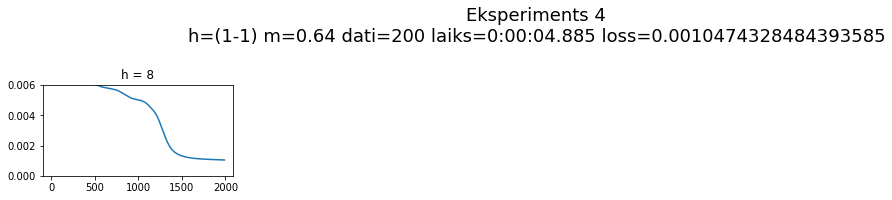

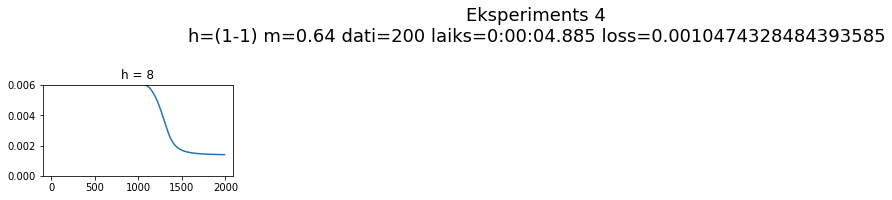


The pretty good losses:
['Loss', 0.005047126077620969, 'Itt.no.', 1000, 'h', 8, 'l', 0.08, 'm', 0.64, 'tl', 0.006149021041752046, 'erFilCnt', 97, 'errDiff', 17.77855542384303]
['Loss', 0.0010474328484393585, 'Itt.no.', 2000, 'h', 8, 'l', 0.08, 'm', 0.64, 'tl', 0.0014013278790645524, 'erFilCnt', 83, 'errDiff', 16.26423952311802]
['Loss', 0.0010474328484393585, 'Itt.no.', 2000, 'h', 8, 'l', 0.08, 'm', 0.64, 'tl', 0.0014013278790645524, 'erFilCnt', 153, 'errDiff', 16.26423952311802]



In [3]:
#This cell summarizes both the training and test losses for all the neural networks that were tested
plt.rcParams['savefig.facecolor'] = "0.8"
plt.close('all')
fig = plt.figure()
fig.suptitle("Eksperiments "+paramExper+"\nh=(1-"
             +str(len(lossgrid))+") m="+str(m)+" dati="+str(trainingData)
             +" laiks="+str(runTime)[:-3]+" loss="+str(best_rez['loss'])
             , fontsize = 18)
fig.set_figheight(13)
#fig.set_figheight(10)
fig.set_figwidth(15)
ax = []
i = 0; j = 0
#plotw = 6
#ploth = 5
plotw = 5
ploth = 7
for x in range(0, len(lossgrid)):
    ax.append(plt.subplot2grid((ploth, plotw), (j, i)))
    ax[x].set_ylim([0,0.006])
    title = ("h = "+str(hiddenLayerNeurons[x]))
    ax[x].set_title(title)
    plt.plot(lossgrid[x])
    if i >= plotw-1:
        j += 1
        i = -1
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.925])
plt.show()

plt.close('all')
fig = plt.figure()
fig.suptitle("Eksperiments "+paramExper+"\nh=(1-"
             +str(len(lossgrid))+") m="+str(m)+" dati="+str(trainingData)
             +" laiks="+str(runTime)[:-3]+" loss="+str(best_rez['loss'])
             , fontsize = 18)
fig.set_figheight(13)
#fig.set_figheight(10)
fig.set_figwidth(15)
ax = []
i = 0; j = 0
for x in range(0, len(testgrid)):
    ax.append(plt.subplot2grid((ploth, plotw), (j, i)))
    ax[x].set_ylim([0,0.006])
    title = ("h = "+str(hiddenLayerNeurons[x]))
    ax[x].set_title(title)
    plt.plot(testgrid[x])
    if i >= plotw-1:
        j += 1
        i = -1
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.925])
plt.show()

#goodloss = sorted(goodloss, key=lambda x: x[11])
print ()
print ("The pretty good losses:")
for x in goodloss:
    print(x)
print()